In [1]:
import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.06346652 0.06346652 0.06346652 0.06346652 0.06346652 0.06346652
  0.06346652 0.06346652 0.06346652 0.06346652 0.06346652 0.06346652
  0.06346652 0.06346652 0.06346652 0.06346652 0.06346652 0.06346652
  0.06346652 0.06346652 0.06346652 0.06346652 0.06346652 0.06346652
  0.06346652]
 [0.12693304 0.12693304 0.12693304 0.12693304 0.12693304 0.12693304
  0.12693304 0.12693304 0.12693304 0.12693304 0.12693304 0.12693304
  0.12693304 0.12693304 0.12693304 0.12693304 0.12693304 0.12693304
  0.12693304 0.12693304 0.12693304 0.12693304 0.12693304 0.12693304
  0.12693304]
 [0.19039955 0.19039955 0.19039955 0.19039955 0.19039955 0.19039955
  0.19039955 0.19039955 0.19039955 0.19039955 0.19039955 0.19039955
  0.19039955 0.19039955 0.19039955 0.1

/tmp/ipykernel_713358/925859422.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=16 )
/tmp/ipykernel_713358/925859422.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),fontsize=16 )
/tmp/ipykernel_713358/925859422.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=16 )
/tmp/ipykernel_713358/925859422.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),fontsize=16 )


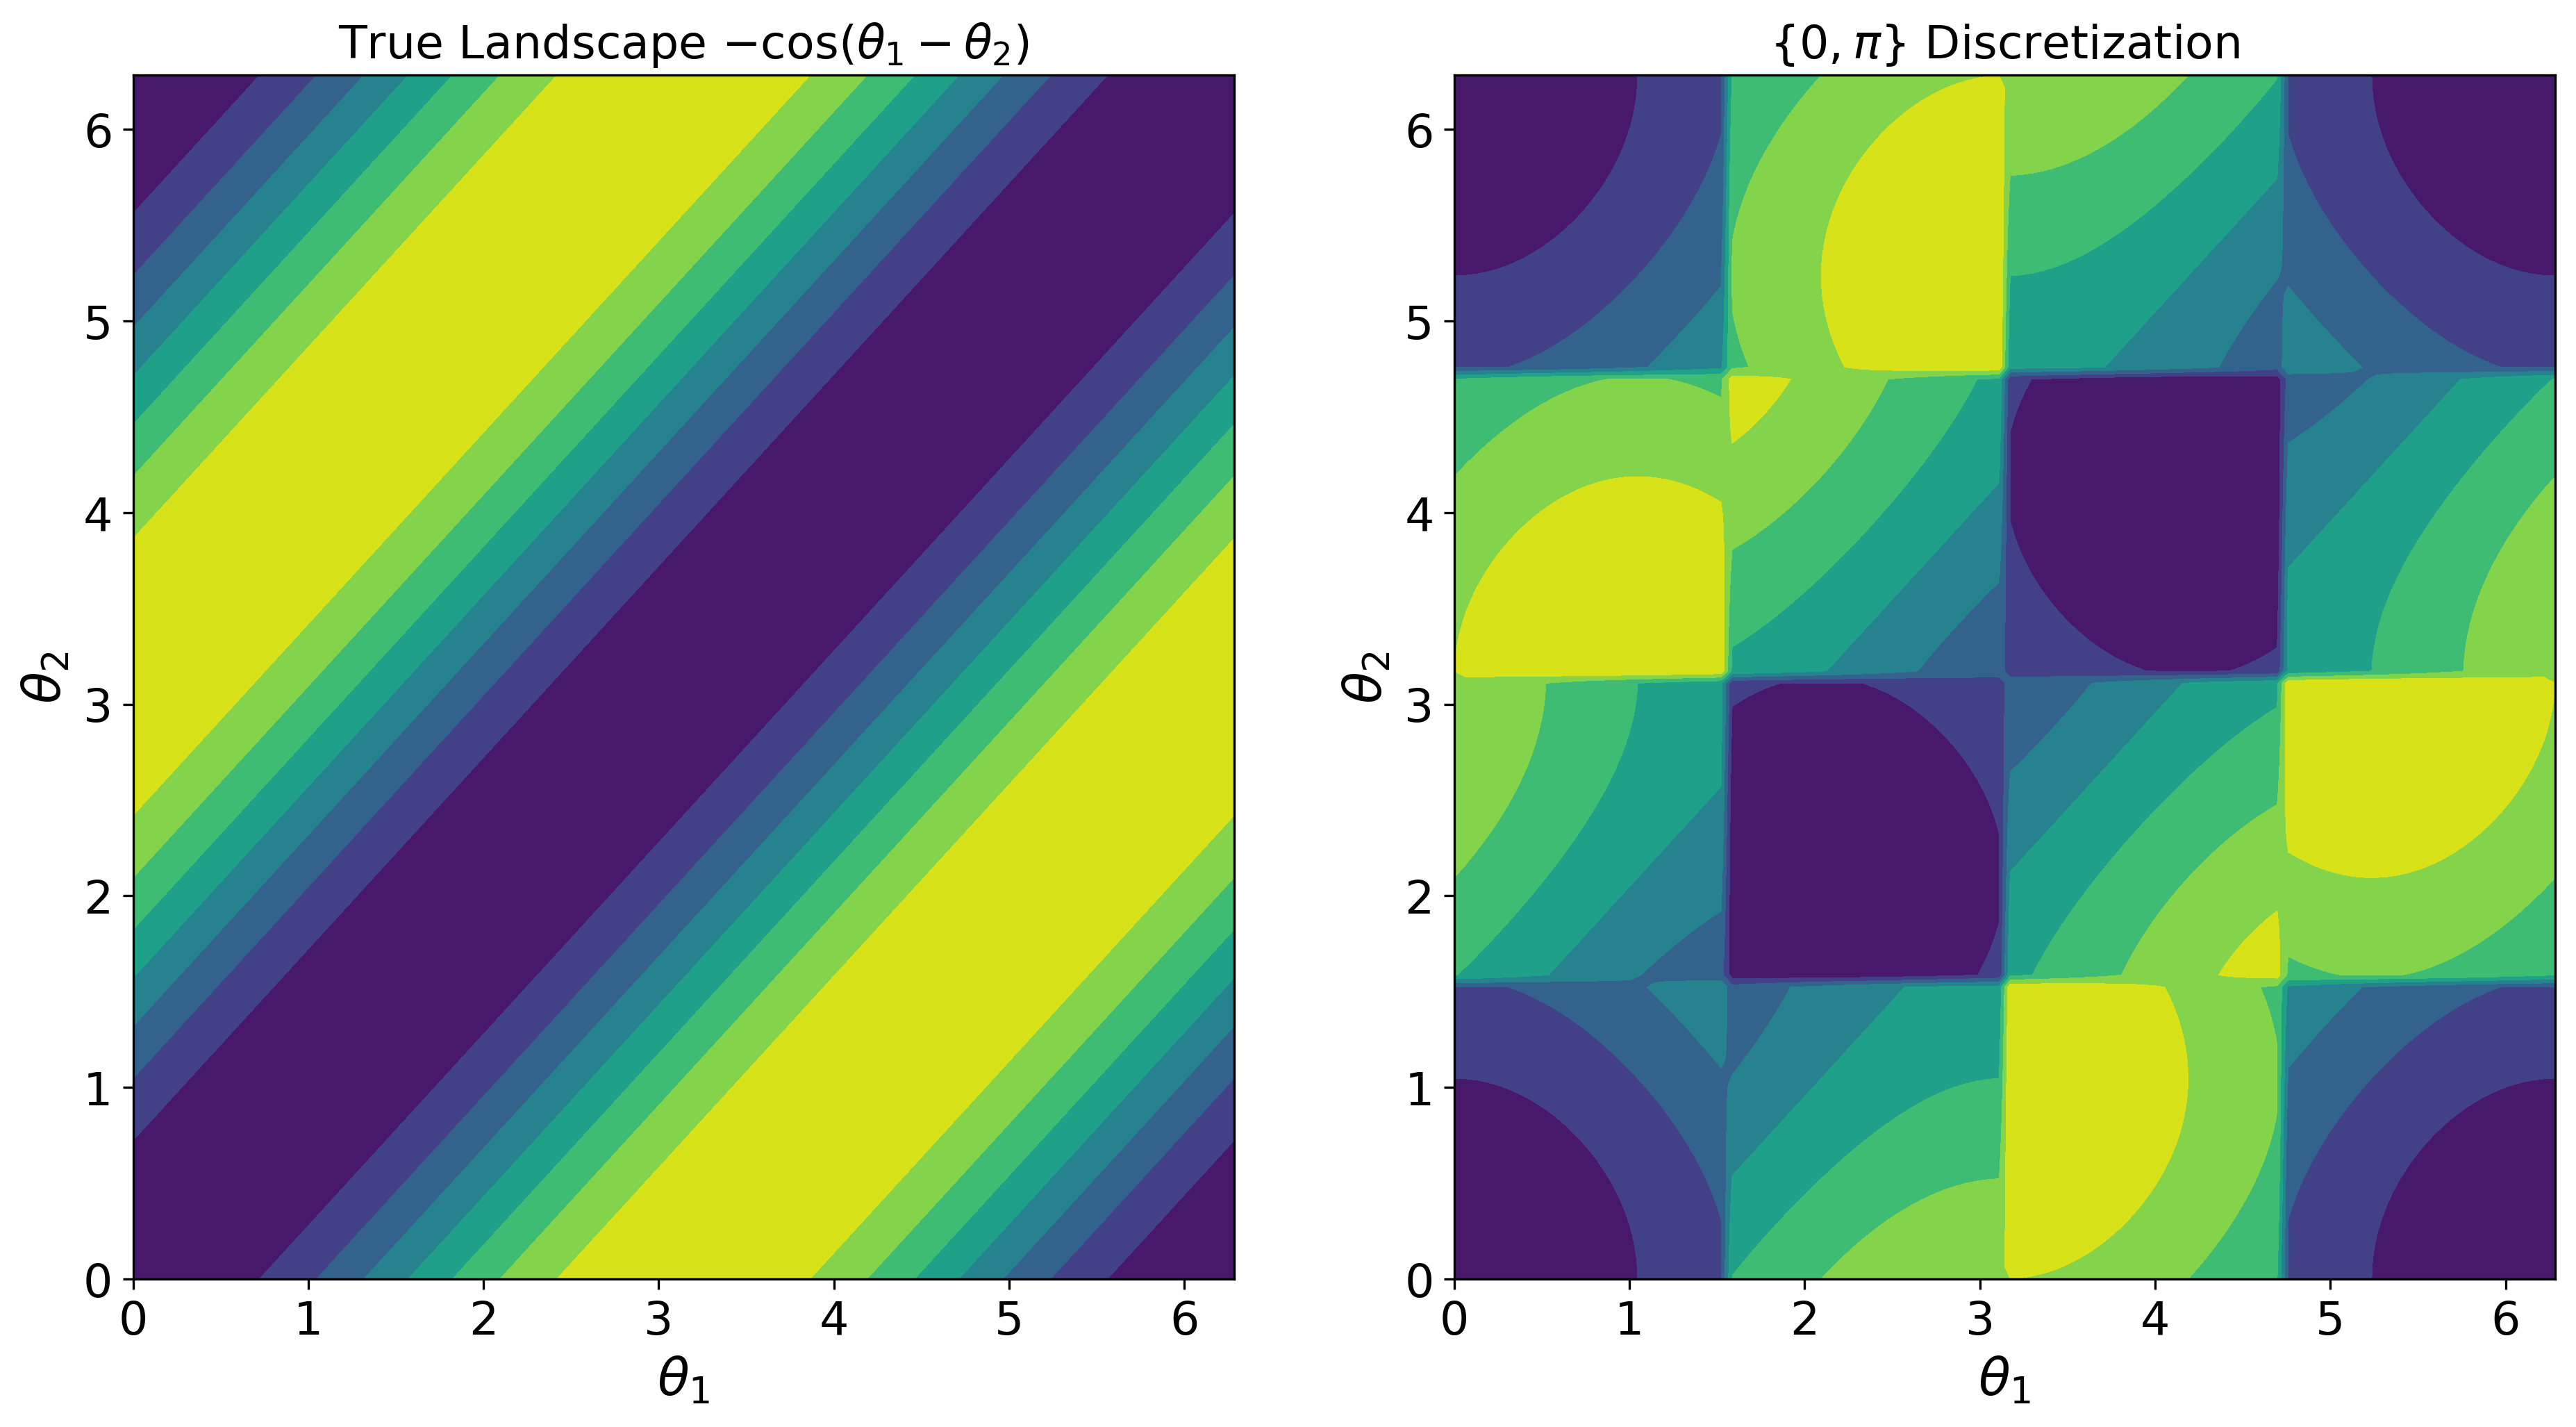

In [2]:
x, y = np.linspace(0, 2 * np.pi, 100),  np.linspace(0, 2 * np.pi, 100)
X, Y = np.meshgrid(x,y)
Z1 = np.cos(X - Y)
from itertools import product
# quant_values = np.arange()
Z2 = np.zeros_like(Z1)
step = 25
for (xlow, xval), (ylow, yval) in product(
     list(zip(np.arange(0, 100, step), np.linspace(0, 2*np.pi, 100 // step))),
      list(zip(np.arange(0, 100, step), np.linspace(0, 2*np.pi, 100 // step)))):
    rangex = np.arange(xlow, xlow+step)
    rangey = np.arange(ylow, ylow+step)
    inds = np.ix_(rangex, rangey)
    Xlim = X[inds]
    Ylim = Y[inds]
    print(Ylim, yval)
    Z2[inds] = np.cos(Ylim - yval) + np.cos(Xlim - xval)

# cos(x)>0, cos(y)>0 
Z3 = np.zeros_like(Z2)
for (xlow, xval), (ylow, yval) in product(
     [(0, 1), (25, 3), (50, 5), (75, 7)],
     [(0, 1), (25, 3), (50, 5), (75, 7)]):
    rangex = np.arange(xlow, xlow+25)
    rangey = np.arange(ylow, ylow+25)
    inds = np.ix_(rangex, rangey)
    Xlim = X[inds]
    Ylim = Y[inds]
    Z3[inds] = np.cos(Xlim-yval) + np.cos(xval - Ylim)

fig, axs = plt.subplots(ncols=2, figsize=(15, 7.5), dpi=300)
axs[0].contourf(X, Y, -Z1)
axs[1].contourf(X, Y, -Z2)
# axs[2].contourf(X, Y, -Z3)
# for ax in axs:
#     ax.set_xlim(-4, 0)
#     ax.set_ylim(-4, 0)
axs[0].set_title("True Landscape $-\\cos(\\theta_1-\\theta_2)$",fontsize=16)
axs[1].set_title("$\{0,\\pi\}$ Discretization",fontsize=16)
# axs[2].set_title("$n\\pi/4$ Discretization",fontsize=16)
for ax in axs:
    ax.set_xlabel("$\\theta_1$", fontsize=18)
    ax.set_ylabel("$\\theta_2$", fontsize=18)
    ax.set_xticklabels(ax.get_xticklabels(),fontsize=16 )
    ax.set_yticklabels(ax.get_yticklabels(),fontsize=16 )
# axs[2].set_title("True Landscape $\\cos(\\theta_1-\\theta_2)$")

/tmp/ipykernel_310682/3779863777.py:19: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  for c in im.collections:


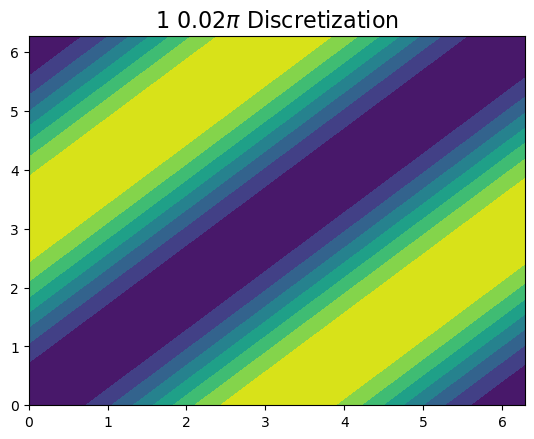

0 0 0.0 0.0
0 50 0.0 3.141592653589793
50 0 3.141592653589793 0.0
50 50 3.141592653589793 3.141592653589793


In [170]:
from matplotlib.animation import FuncAnimation

fig,ax = plt.subplots()
im = ax.contourf(X, Y, -Z2)
def return_plot(step):
    global im
    Z2 = np.zeros_like(Z1)
    for (xlow, xval), (ylow, yval) in product(
        list(zip(np.arange(0, 100, step), np.linspace(0, 2*np.pi, 100 // step, endpoint=False))),
        list(zip(np.arange(0, 100, step), np.linspace(0, 2*np.pi, 100 // step, endpoint=False)))):
        if (step == 50):
            print(xlow, ylow, xval, yval)
        rangex = np.arange(xlow, xlow+step)
        rangey = np.arange(ylow, ylow+step)
        inds = np.ix_(rangex, rangey)
        Xlim = X[inds]
        Ylim = Y[inds]
        Z2[inds] = np.cos(Ylim - yval) + np.cos(Xlim - xval) 
    for c in im.collections:
        c.remove()  # removes only the contours, leaves the rest intact
    im = ax.contourf(X, Y, -Z2)
    ax.set_title(f"{step} {2*step/(100):.2f}$\\pi$ Discretization",fontsize=16)
    plt.show()
    return im
anim = FuncAnimation(
        fig,
        return_plot,
        frames = [i for i in np.arange(1,100) if 100 % i == 0]
    )
anim.save('val.gif', fps=1, dpi=200)

50
0 0 50 50 0.0 0.0
0 50 50 50 0.0 3.141592653589793
50 0 50 50 3.141592653589793 0.0
50 50 50 50 3.141592653589793 3.141592653589793


/tmp/ipykernel_310682/2359488875.py:20: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  for c in im.collections:


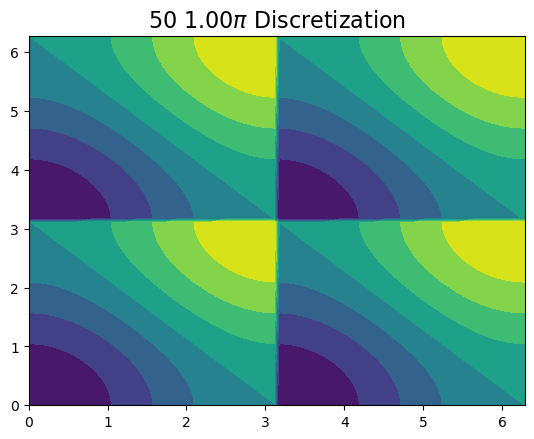

In [162]:
fig,ax = plt.subplots()
im = ax.contourf(X, Y, Z2)
return_plot(50)

In [196]:
df

,graph,blocks,epoch,bandwidth,solver,cut,bits,gname
0,/home/matt/Documents/bench/GSET/set/G001,2,0.024034,1000.0,brim,11620.0,0,G001
1,/home/matt/Documents/bench/GSET/set/G001,2,0.024034,1000.0,brim,11586.0,0,G001
2,/home/matt/Documents/bench/GSET/set/G001,2,0.024034,1000.0,brim,11599.0,0,G001
3,/home/matt/Documents/bench/GSET/set/G001,2,0.024034,1000.0,brim,11578.0,0,G001
4,/home/matt/Documents/bench/GSET/set/G001,2,0.024034,1000.0,brim,11602.0,0,G001
...,...,...,...,...,...,...,...,...
7035,/home/matt/Documents/bench/GSET/set/G014,2,2.403413,10.0,kuramoto,2846.0,4,G014
7036,/home/matt/Documents/bench/GSET/set/G014,2,2.403413,10.0,kuramoto,2895.0,4,G014
7037,/home/matt/Documents/bench/GSET/set/G014,2,2.403413,10.0,kuramoto,2874.0,4,G014
7038,/home/matt/Documents/bench/GSET/set/G014,2,2.403413,10.0,kuramoto,2854.0,4,G014


In [3]:
mpl.font_manager.OSXFontDirectories = ['/Library/Fonts/',
 '/Network/Library/Fonts/',
 '/System/Library/Fonts/',
 '/opt/local/share/fonts',
 '/home/mburns13/Library/Fonts']

In [1]:
import pandas as pd
import seaborn as sns
import os
import sys
sys.path.insert(0, os.environ['PLOT_SETTINGS_DIR'])
# import plot_settings
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.get_data_path()
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif']= 'STIXGeneral'
mpl.rcParams['mathtext.fontset']= 'stix'
mpl.rcParams['font.size']= 18
# mpl.font_manager.rebuild()

args = dict(palette='tab10', x='')

# df = pd.read_csv('./kuramoto_linear_comparison_quantized_k10.csv')
df = pd.read_csv('./kuramoto_linear_comparison_quantized.csv')

df['gname'] = df['graph'].str.extract(r'/([\w\d]+)$')
df['Precision'] = df['bits'].astype(str) + 'b'
df['Precision'] = df['Precision'].replace({'0b': "Full"})
df['solver'] = df['solver'].replace({'brim': "Linear", 'kuramoto': 'Kuramoto'})
# df['Epoch ($\\tau$)'] = df['epoch']
df = df.rename(columns={'epoch':"Epoch ($\\tau$)", 'cut':"Cut"})
# for graph, lim_df in df.groupby('graph'):
#     for 
palette = [
    '#ca0020',
    "#f4a582",
    "#bababa",
    '#404040'
][::-1]
if False:
    for (block, graph, solver), subdf in df.groupby(['blocks', 'gname', 'solver']):
        fig, ax = plt.subplots(dpi=300, figsize=(7,5))
        sns.lineplot(ax=ax, 
                    palette=palette,
                    data=subdf, 
                    x='Epoch ($\\tau$)', 
                    y='Cut',
                    hue='Precision',
                    marker='o',
                    err_style='bars',
                    linestyle='--',
                    markeredgecolor='black',
                    linewidth=3,
                    markersize=8    
                    )
        ax.set_title(f'{block} Block {solver} {graph.replace("0", "")} (Limited Precision)')
        ax.set_xscale('log')
        ax.grid()
        # plt.show()
        fig.savefig(f'figures/{solver}_{graph}_{block}.pdf', 
                    dpi=300, 
                    bbox_inches='tight')
    # fig.savefig()
# ax.set_yscale('log')
# ax.set_title('4 Block Kuramoto (G018)')
# ax.grid()

# ax.set_ylim(10000, 12000)

G001


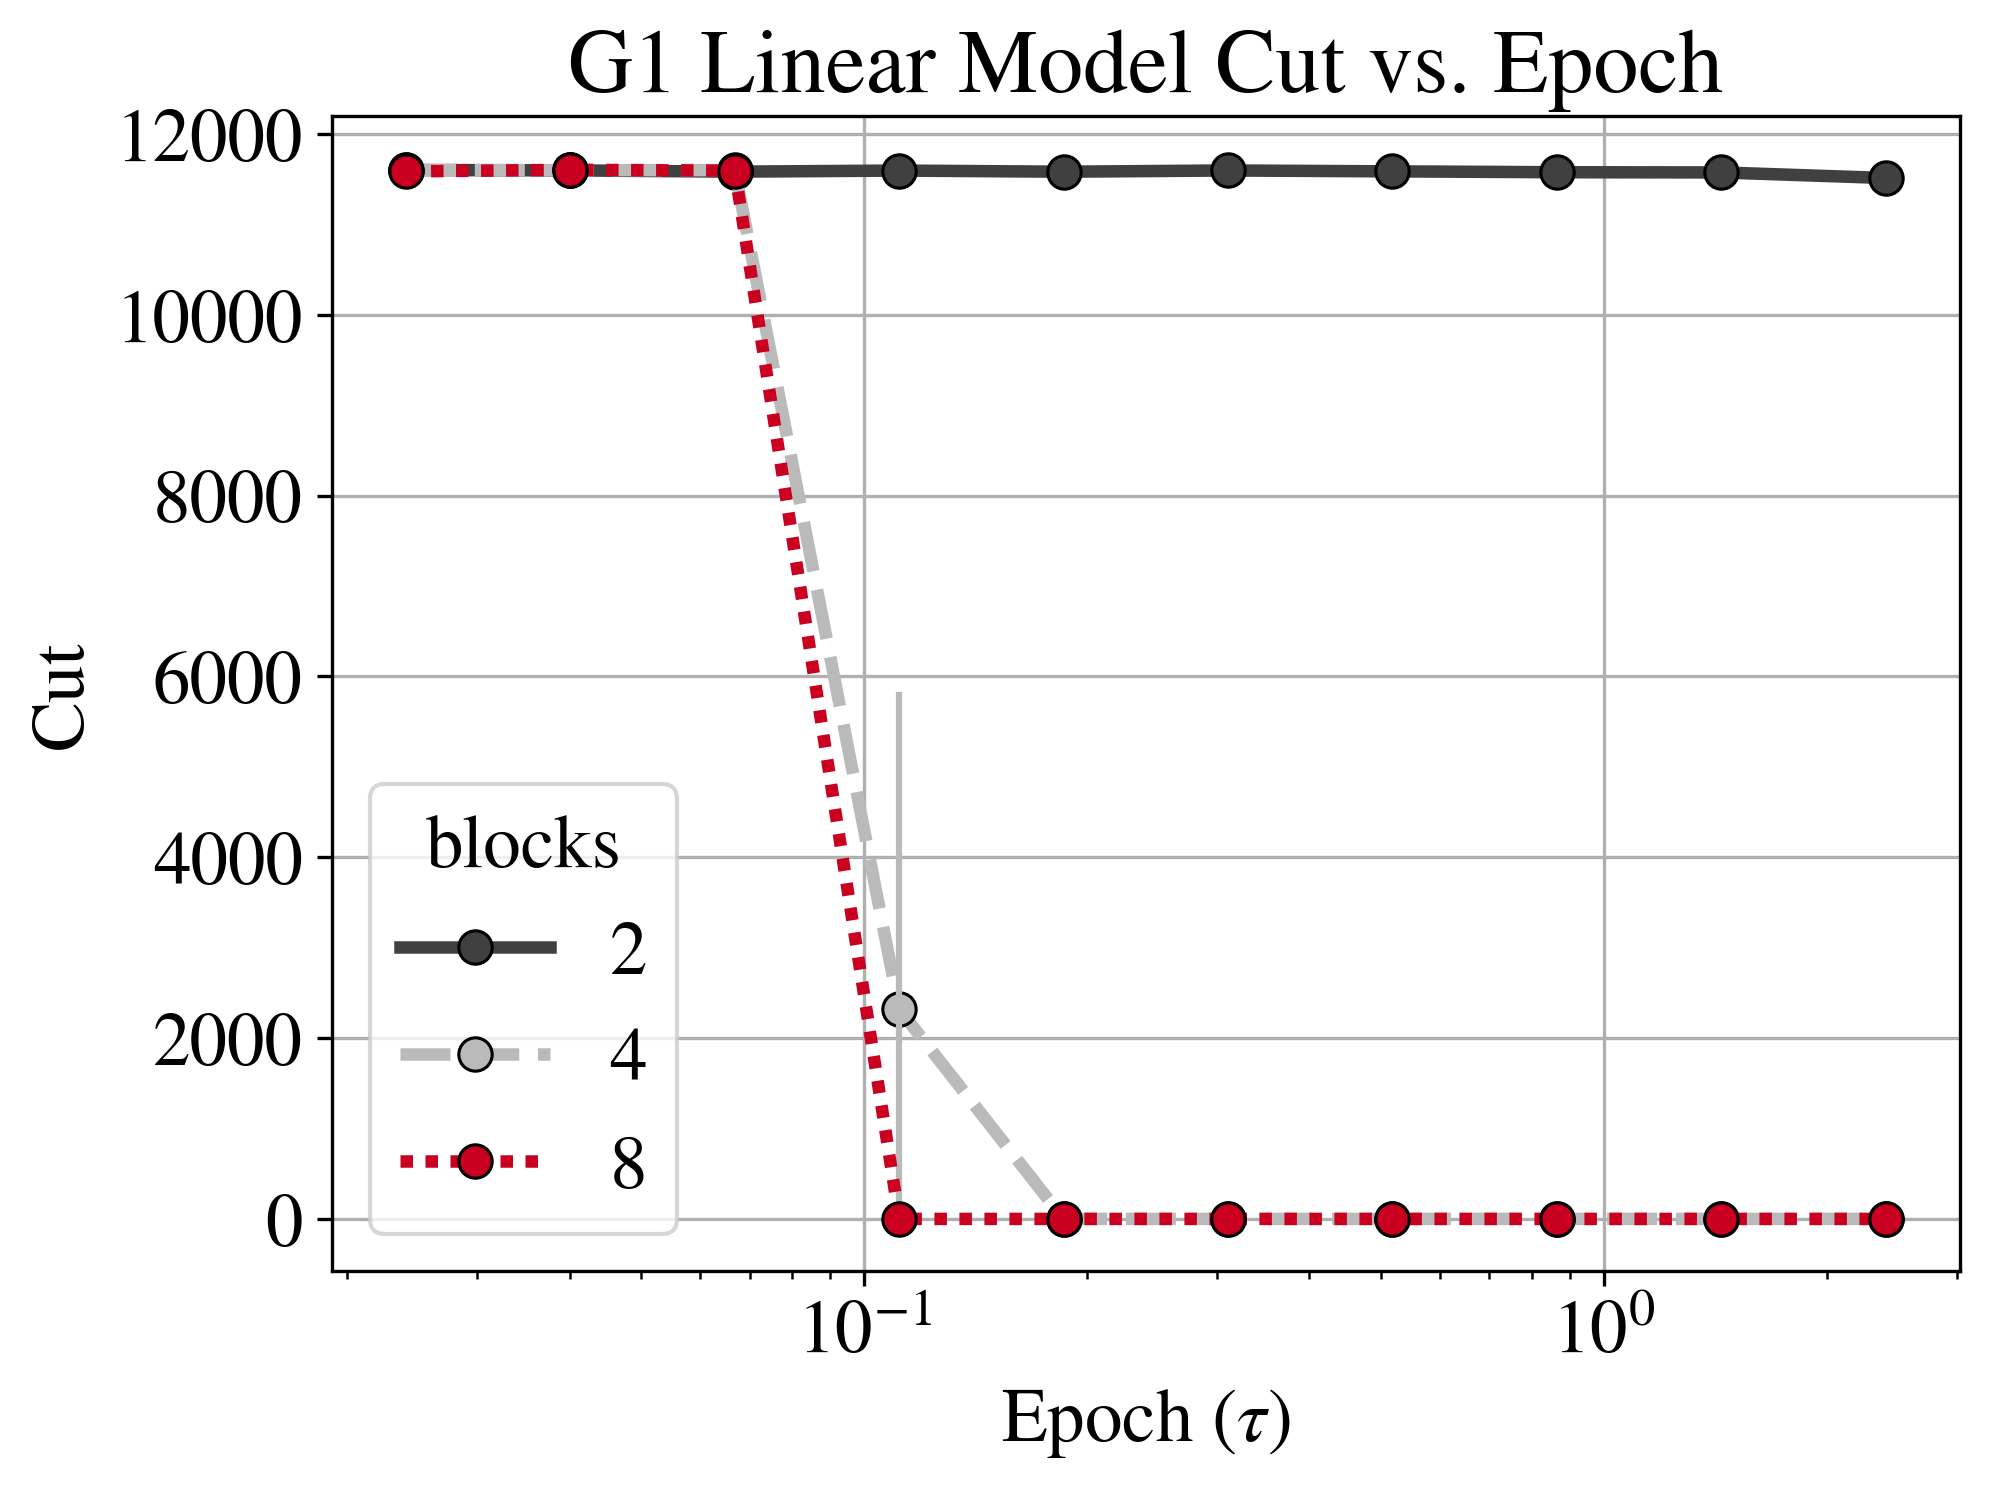

In [ ]:

palette = [
    '#ca0020',
    # "#f4a582",
    "#bababa",
    '#404040'
][::-1]
for graph, subdf in df.query('bits == 0 and solver == "Linear" and gname == "G001"').groupby('gname'):
    fig, ax = plt.subplots(dpi=300, figsize=(7,5))
    print(graph)
    subdf = subdf.rename(columns={""})
    sns.lineplot(ax=ax, 
                palette=palette,
                data=subdf, 
                x='Epoch ($\\tau$)', 
                y='Cut',
                hue='blocks',
                err_style='bars',
                style='blocks',
                markeredgecolor='black',
                linewidth=3,
                markersize=8,
                marker='o'
                # markers=True 
                )
    ax.set_title(f'{graph.replace("0", "")} Linear Model Cut vs. Epoch')
    ax.set_xscale('log')
    ax.grid()
    plt.show()
    fig.savefig(f'figures/g1_linear_diverge.pdf', 
                dpi=300, 
                bbox_inches='tight')

array([-1.32741517e+01, -1.32297595e+01, -1.30386904e+01, -1.29898191e+01,
       -1.28379368e+01, -1.28090199e+01, -1.28007331e+01, -1.26682822e+01,
       -1.26211783e+01, -1.25010801e+01, -1.24918942e+01, -1.24201012e+01,
       -1.23880609e+01, -1.23198787e+01, -1.22261728e+01, -1.22138326e+01,
       -1.20859832e+01, -1.20320317e+01, -1.19894497e+01, -1.19314980e+01,
       -1.18600352e+01, -1.18307535e+01, -1.17823219e+01, -1.17008456e+01,
       -1.16796619e+01, -1.16625447e+01, -1.15626422e+01, -1.15391237e+01,
       -1.14657475e+01, -1.14039078e+01, -1.13739825e+01, -1.13030258e+01,
       -1.12228379e+01, -1.11693619e+01, -1.11401154e+01, -1.10681643e+01,
       -1.09386953e+01, -1.09138083e+01, -1.09050823e+01, -1.08341188e+01,
       -1.08166583e+01, -1.07575302e+01, -1.07403711e+01, -1.07214869e+01,
       -1.06466965e+01, -1.06048140e+01, -1.05806666e+01, -1.05520763e+01,
       -1.04692561e+01, -1.04431568e+01, -1.04198024e+01, -1.03582844e+01,
       -1.03145524e+01, -

array([1.89421146e-04, 2.11951520e-02, 2.99155941e-02, 4.70481510e-02,
       6.16211931e-02, 7.52511714e-02, 7.64237022e-02, 9.20185013e-02,
       1.02128378e-01, 1.08491126e-01, 1.21464691e-01, 1.34403177e-01,
       1.72144688e-01, 1.73299583e-01, 1.98129445e-01, 2.19646740e-01,
       2.24679070e-01, 2.46330600e-01, 2.58792512e-01, 2.69086507e-01,
       2.76546605e-01, 3.11574798e-01, 3.21870138e-01, 3.27102855e-01,
       3.48959083e-01, 3.55807875e-01, 3.65600948e-01, 3.78740627e-01,
       3.79218815e-01, 3.94620022e-01, 4.13221734e-01, 4.35751013e-01,
       4.55755918e-01, 4.59396532e-01, 4.74528676e-01, 4.83824107e-01,
       4.94886503e-01, 5.03045779e-01, 5.16715065e-01, 5.22237412e-01,
       5.33376342e-01, 5.38720982e-01, 5.65133550e-01, 5.72032878e-01,
       5.81704644e-01, 5.86274070e-01, 6.12510876e-01, 6.17411677e-01,
       6.38640251e-01, 6.67689411e-01, 6.75581471e-01, 6.77472904e-01,
       6.83807960e-01, 7.02270528e-01, 7.17077934e-01, 7.19499583e-01,
      

Text(0.5, 1.0, '4 Block BRIM (G018)')

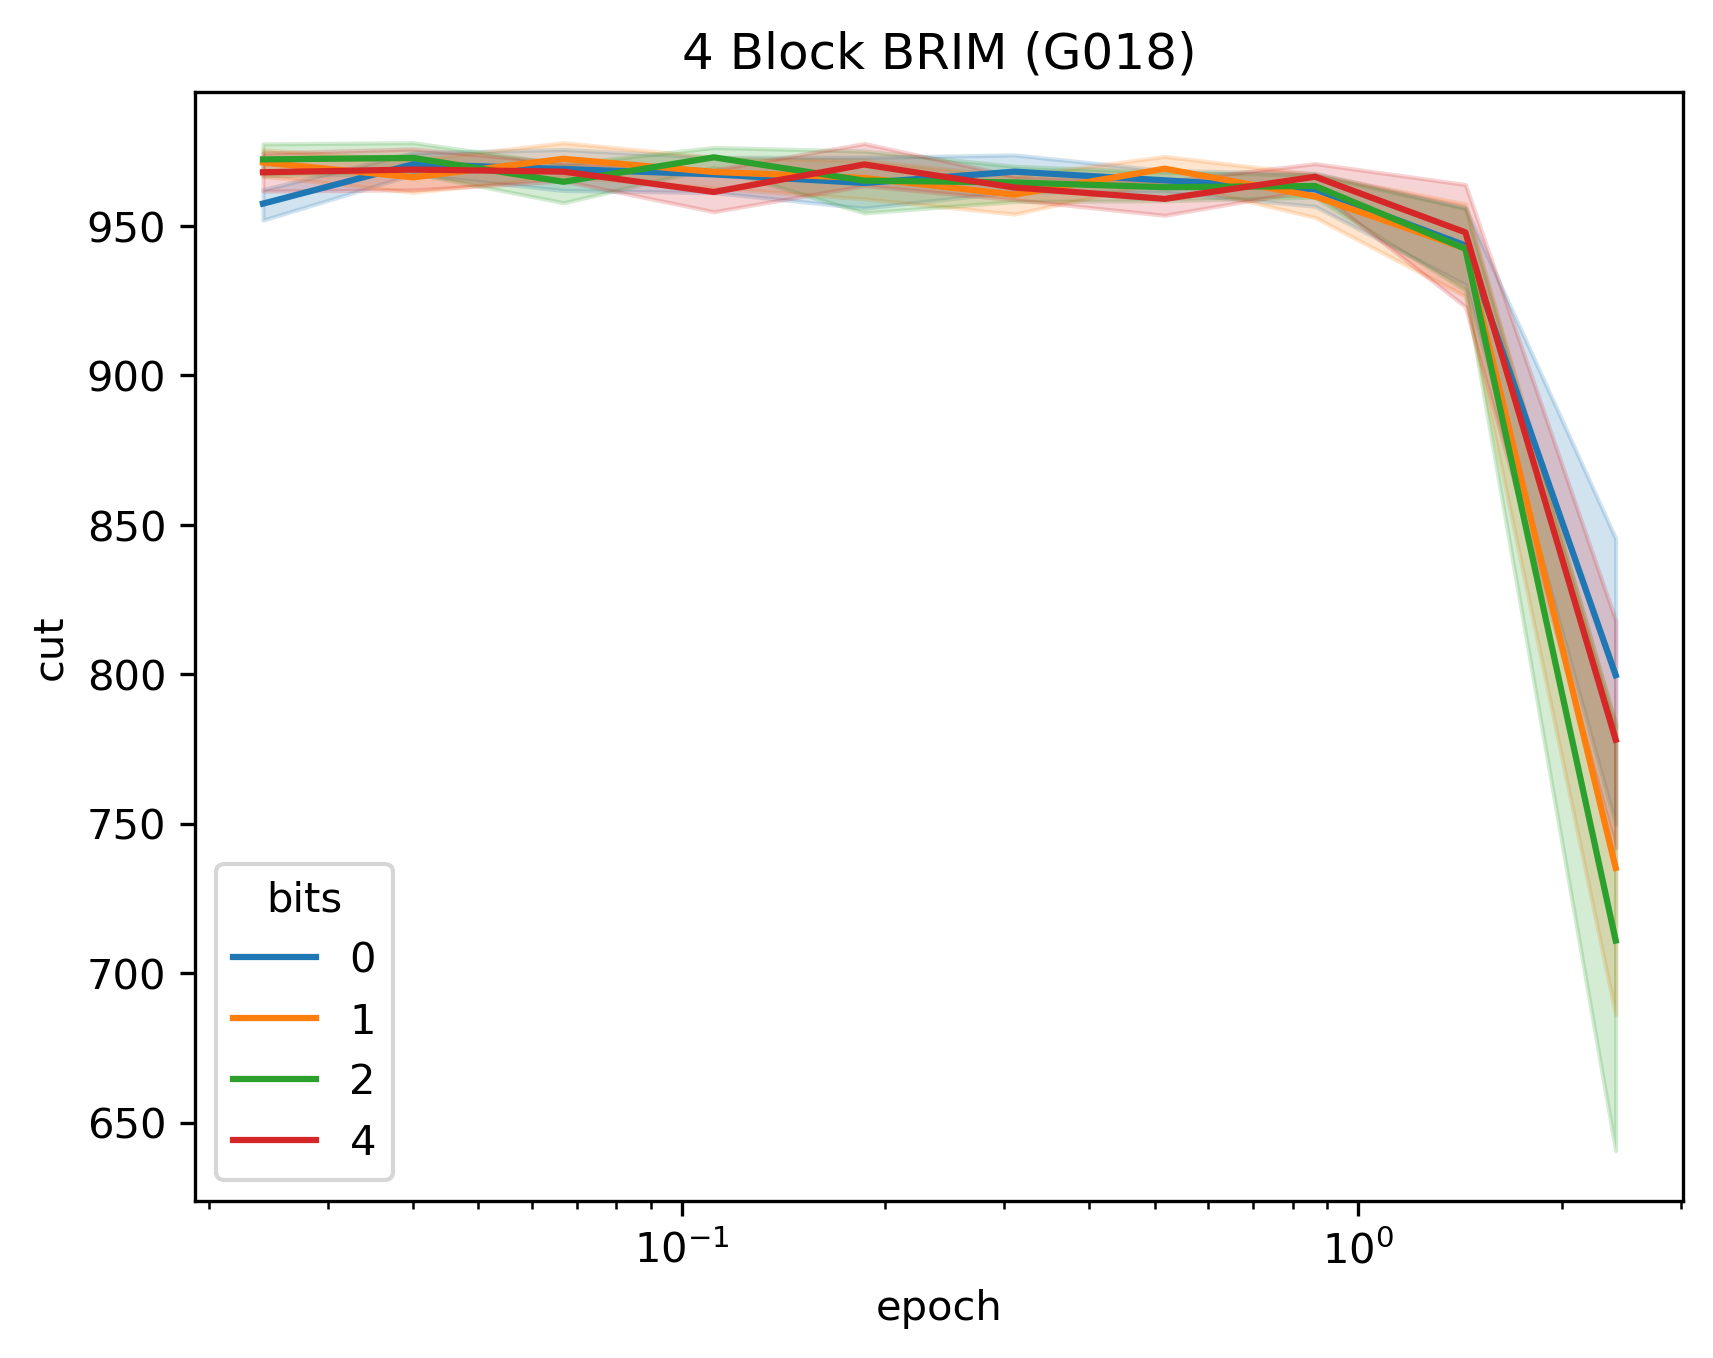

In [212]:

fig, ax = plt.subplots(dpi=300)
sns.lineplot(ax=ax, palette='tab10',data=df.query('gname == "G018" and solver == "brim" and blocks == 4'), x='epoch', y='cut', hue='bits')
ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_title('4 Block BRIM (G018)')

In [ ]:
fig, ax = plt.subplots(figsize=(7.5, 7.5), dpi=300)

In [75]:
float(str(ax.get_xticklabels()[0].get_text().replace('\'', "")))

ValueError: could not convert string to float: '−4'

In [76]:
print(ax.get_xticklabels()[0].get_text().replace('\'', ""))

−4


/tmp/ipykernel_310682/1536207826.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=16 )
/tmp/ipykernel_310682/1536207826.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),fontsize=16 )
/tmp/ipykernel_310682/1536207826.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=16 )
/tmp/ipykernel_310682/1536207826.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),fontsize=16 )


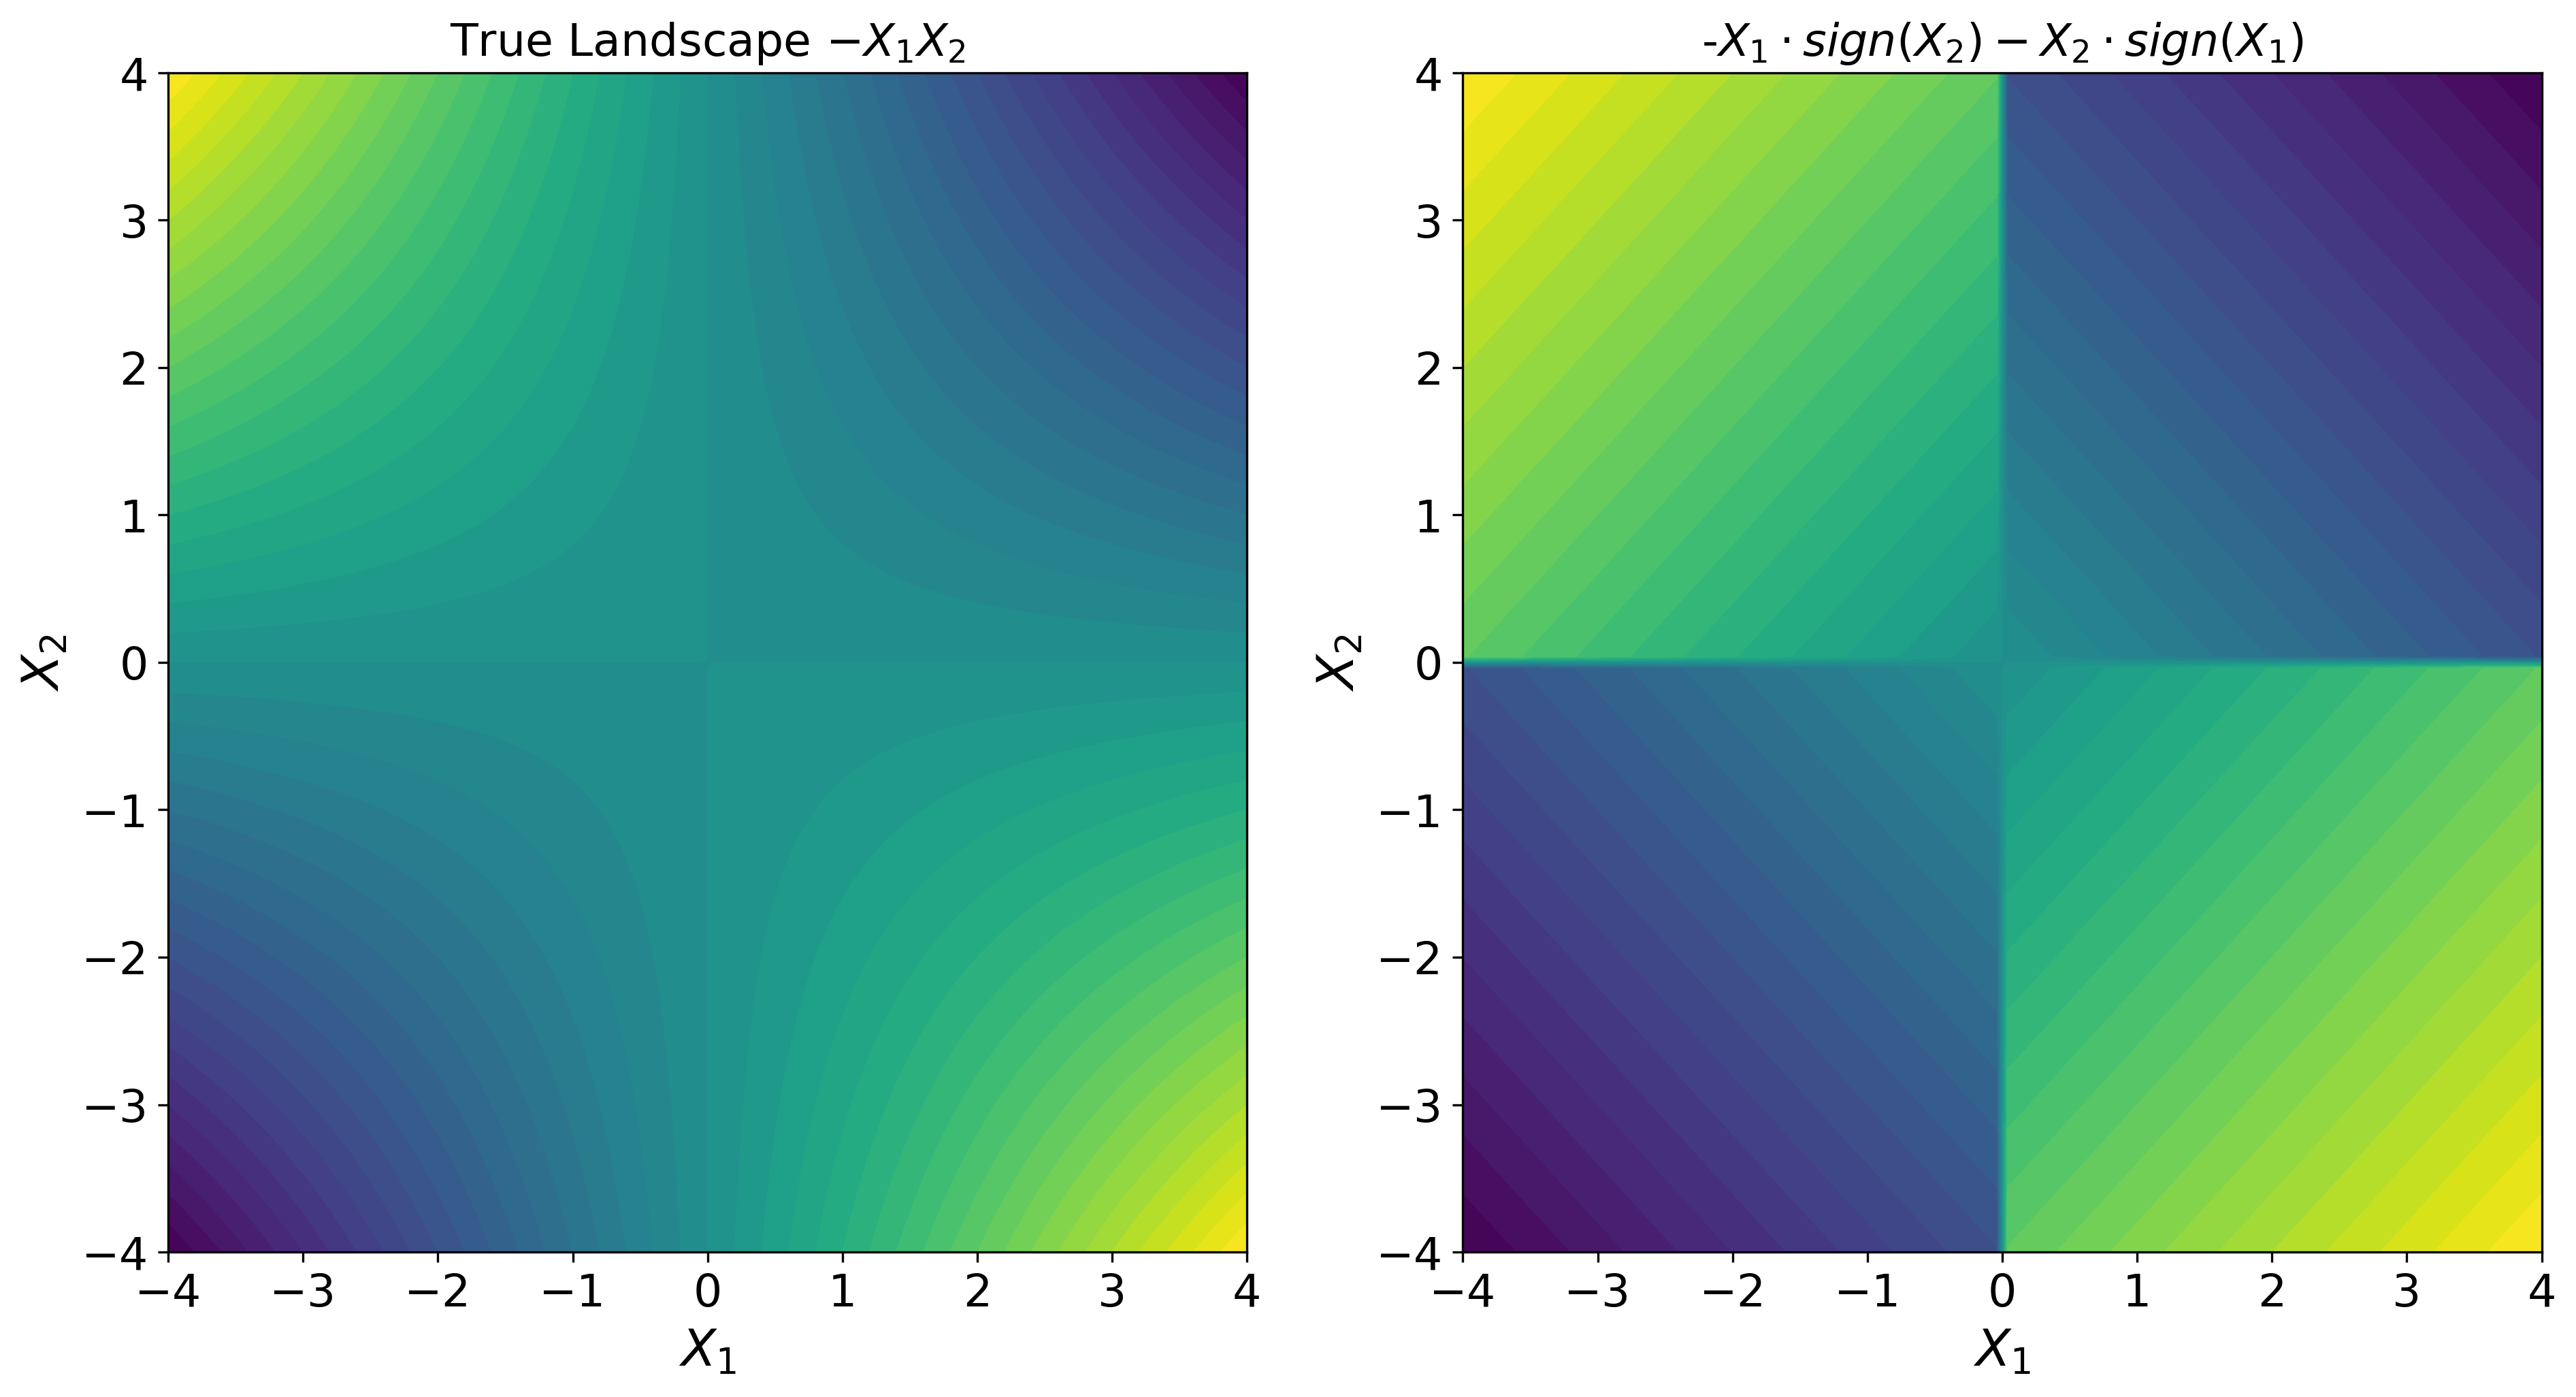

In [97]:
x, y = np.linspace(-4, 4, 100),  np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x,y)
coeff = 100
Z1 = X*Y
Z2 = X + Y
Z2[np.ix_(np.arange(50), np.arange(50))] = (-X + -Y)[np.ix_(np.arange(50), np.arange(50))]
Z2[np.ix_(np.arange(50,100), np.arange(50))] = (X + -Y)[np.ix_(np.arange(50,100), np.arange(50))]
Z2[np.ix_(np.arange(50), np.arange(50,100))] = (-X + Y)[np.ix_(np.arange(50), np.arange(50,100))]
Z1 *= coeff
Z2 *= coeff
fig, axs = plt.subplots(ncols=2, figsize=(15, 7.5), dpi=300)
axs[0].contourf(X, Y, -Z1, levels=50)
axs[1].contourf(X, Y, -Z2, levels=50)
axs[0].set_title("True Landscape $-X_1X_2$",fontsize=16)
axs[1].set_title("-$X_1\\cdot sign(X_2)-X_2\\cdot sign(X_1)$",fontsize=16)
for ax in axs:
    ax.set_xlabel("$X_1$", fontsize=18)
    ax.set_ylabel("$X_2$", fontsize=18)
    ax.set_xticklabels(ax.get_xticklabels(),fontsize=16 )
    ax.set_yticklabels(ax.get_yticklabels(),fontsize=16 )
    

(array([[ 0],
        [ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10],
        [11],
        [12],
        [13],
        [14],
        [15],
        [16],
        [17],
        [18],
        [19],
        [20],
        [21],
        [22],
        [23],
        [24],
        [25],
        [26],
        [27],
        [28],
        [29],
        [30],
        [31],
        [32],
        [33],
        [34],
        [35],
        [36],
        [37],
        [38],
        [39],
        [40],
        [41],
        [42],
        [43],
        [44],
        [45],
        [46],
        [47],
        [48],
        [49]]),
 array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
         16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
         32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
         48, 49]]))